In [396]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
df = pd.read_csv("New_data/Simulation_Outputs", delimiter="\t")


In [397]:
col_2 = df.iloc[:, 4].values
consommation = pd.DataFrame(col_2.reshape(-1, 24))
consommation2 = pd.DataFrame(col_2.reshape(-1, 24))

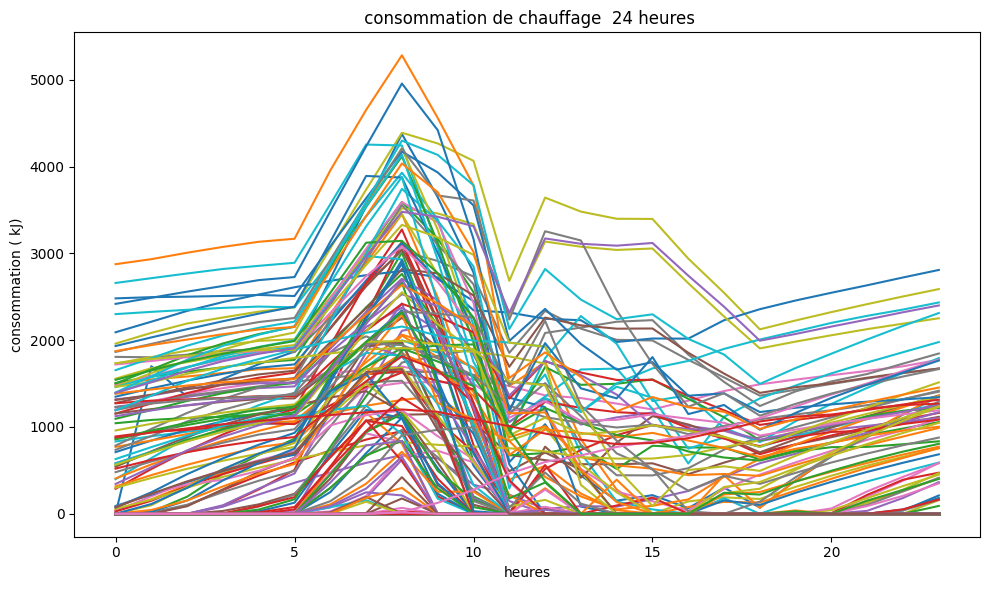

In [398]:
plt.figure(figsize=(10, 6))
for index, row in consommation.iterrows():
    plt.plot(range(0, 24), row, label=f"Jour {col}")

plt.xlabel("heures")
plt.ylabel("consommation ( kJ)")
plt.title(" consommation de chauffage  24 heures")


plt.tight_layout()
plt.show()
    


In [399]:
def apply_kmeans(n_clusters,data):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    return kmeans 

In [400]:
consommation["heat_on"] = 1



for index, row in consommation.iterrows():
    row_sum = row.drop('heat_on').sum()
    #print(row_sum) 
    if row_sum == 0.0:
        consommation.at[index, "heat_on"] = 0  
       
       
    else:
        consommation.at[index, "heat_on"] = 1
consommation2=consommation.copy()

In [402]:
consommation2

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,heat_on
0,0.000000,1700.066294,1347.984793,1554.008583,1723.533501,1868.834847,2706.914595,3546.369880,4375.875038,3647.778508,...,214.747636,64.605559,301.754998,71.806798,383.298965,660.499700,912.855637,1144.154062,1353.900588,1
1,1491.939056,1547.782339,1581.992606,1621.999496,1665.591626,1677.862089,2299.480193,2891.085462,3452.262539,2493.089562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,23.109325,197.050531,463.498337,679.743637,864.415518,1589.387942,2319.284930,3009.934551,1909.953089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,88.114725,280.653789,505.875630,1400.215036,2275.884541,3122.756211,2068.535478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,29.507561,713.622089,1425.397605,2108.474937,2187.767164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2418.398856,2488.812828,2559.303243,2624.502209,2691.939571,2727.471354,3485.763673,4232.906109,4956.560424,4419.886968,...,1805.627331,1149.027865,1253.452838,968.508001,1162.718028,1335.405727,1486.929852,1627.824532,1765.498483,1
361,1874.318401,1943.776377,2007.072866,2068.672056,2123.964230,2152.303814,2802.356185,3429.966998,4036.176485,3704.934104,...,1345.072052,1227.366769,1175.359712,977.271446,1089.601484,1191.454816,1285.794109,1372.964695,1454.326998,1
362,1542.990960,1651.826410,1757.861976,1843.285837,1918.514274,1990.156365,2546.069803,3123.468791,3144.330226,2772.159742,...,0.000000,0.000000,242.514706,221.417120,371.387896,496.029151,612.113948,716.662564,805.780021,1
363,880.279807,935.453069,983.487314,1031.759905,1069.724646,1102.906685,1137.759877,1169.155164,1201.638210,1175.079978,...,815.869576,871.470768,962.960611,1063.717496,1119.819541,1143.815323,1196.102767,1259.225571,1315.056043,1


In [403]:
consommation_heat = consommation[consommation["heat_on"] == 1].drop(columns=["heat_on"])

model = apply_kmeans(n_clusters=3, data=consommation_heat)
consommation.loc[consommation["heat_on"] == 1, "clusters"] = model.labels_

consommation.loc[consommation["heat_on"] == 0, "clusters"] = 3


In [404]:
def plot_clusters(consommation):
    min_val = consommation.iloc[:, :-1].min().min() 
    max_val = consommation.iloc[:, :-1].max().max()
    ylim = [min_val - 2, max_val + 2]  
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for i in range(4): 
        ax = axes[i // 2, i % 2] 
        cluster_data = consommation[consommation["clusters"] == i]
        
        for index, row in cluster_data.iterrows():
            ax.plot(range(24), row.iloc[:-1], color='gray', alpha=0.5) 
            
        center = cluster_data.iloc[:, :-1].mean(axis=0) 
        ax.plot(range(24), center, color='red', label=f'Cluster {i} ({len(cluster_data)})')

        ax.set_xlim([0, 24])  
        ax.set_ylim(ylim) 
        ax.set_title(f"Cluster {i}")
        ax.set_xlabel("Heures")
        ax.set_ylabel("Consommation (kJ/h)") 
        ax.legend()

    plt.tight_layout()
    plt.show()


In [405]:
def plot_cluster_centers_with_colors(data_normalized, cluster_assignments, y_label="Valeur"):
    cluster_centers = []
    for cluster_id in np.unique(cluster_assignments):
        cluster_data = data_normalized[cluster_assignments == cluster_id]
        cluster_center = cluster_data.iloc[:, :-1].mean().values 
        cluster_centers.append(cluster_center)

    cluster_centers = np.array(cluster_centers)

    num_clusters = len(cluster_centers)
    colors = plt.cm.get_cmap('tab10', num_clusters)  

    plt.figure(figsize=(10, 6))

    for cluster_id, cluster_center in enumerate(cluster_centers):
        plt.plot(range(24), cluster_center, color=colors(cluster_id), linewidth=3, label=f"Centre du cluster {cluster_id}")

    plt.title("Centres des Clusters")
    plt.xlabel("Heures")
    plt.ylabel(y_label)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.grid(True)
    plt.tight_layout()

    plt.show()

***************3 clusters pour les jours où le chauffage est allumé et 1 cluster pour les jours d'été***************


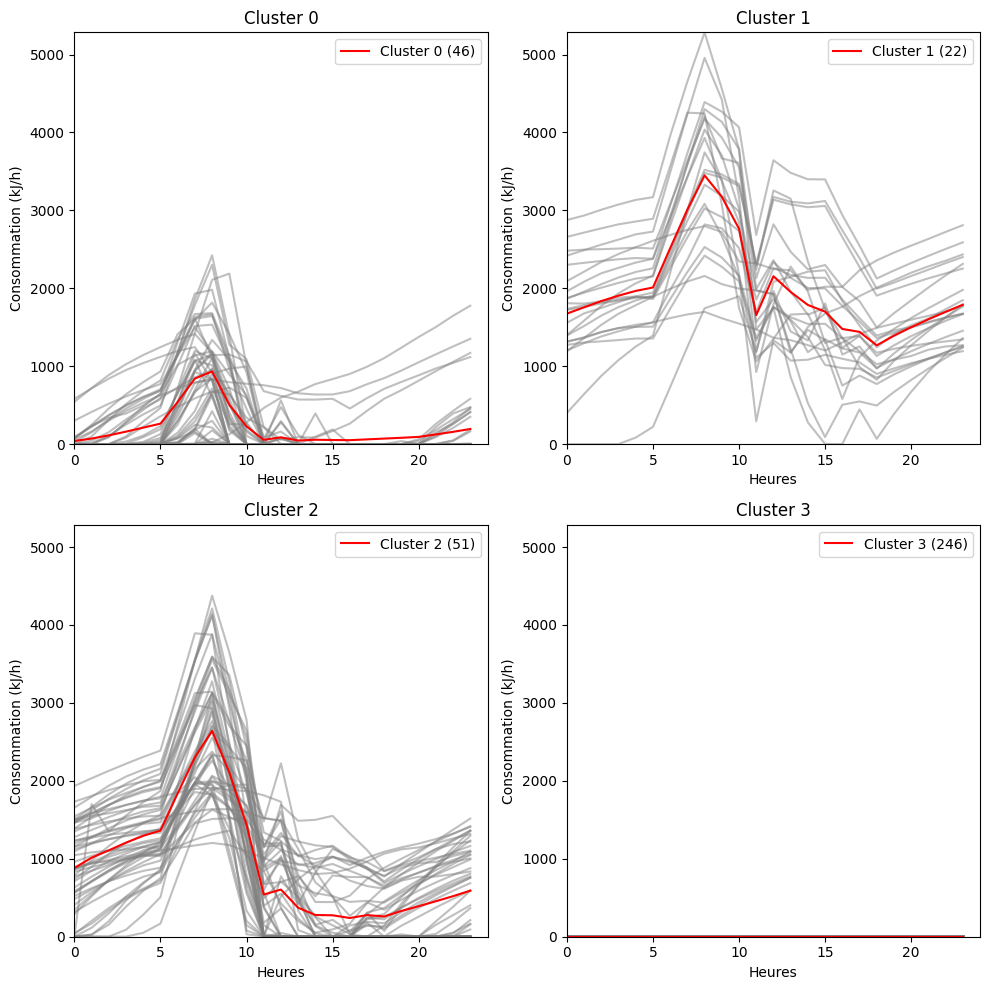

In [406]:
print("***************3 clusters pour les jours où le chauffage est allumé et 1 cluster pour les jours d'été***************")
plot_clusters(consommation.drop(columns=["heat_on"]))

C:\Users\toubia\AppData\Local\Temp\ipykernel_11988\409244317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


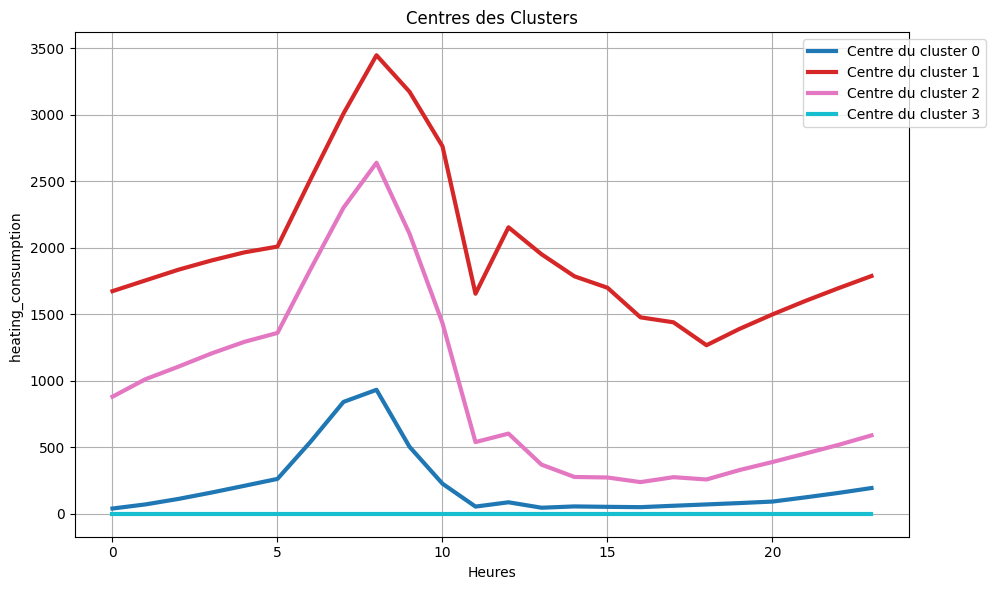

In [407]:
plot_cluster_centers_with_colors(consommation.drop(columns=["heat_on"]), consommation["clusters"], y_label="heating_consumption ")

In [417]:
labels = consommation['clusters'] 

consommation3=consommation.drop(columns=["clusters","heat_on"])
sil_score = silhouette_score(consommation3, labels, metric='euclidean')
db_score = davies_bouldin_score(consommation3, labels)

print(f"Davies-Bouldin Index: {db_score}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 0.9807331130499215
Silhouette Score: 0.7023558760929302


In [409]:
consommation.to_csv("New_data/consommation",index=False)

In [420]:
consommation_heat

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,clusters
0,0.000000,1700.066294,1347.984793,1554.008583,1723.533501,1868.834847,2706.914595,3546.369880,4375.875038,3647.778508,...,214.747636,64.605559,301.754998,71.806798,383.298965,660.499700,912.855637,1144.154062,1353.900588,1
1,1491.939056,1547.782339,1581.992606,1621.999496,1665.591626,1677.862089,2299.480193,2891.085462,3452.262539,2493.089562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,23.109325,197.050531,463.498337,679.743637,864.415518,1589.387942,2319.284930,3009.934551,1909.953089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,88.114725,280.653789,505.875630,1400.215036,2275.884541,3122.756211,2068.535478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,29.507561,713.622089,1425.397605,2108.474937,2187.767164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2418.398856,2488.812828,2559.303243,2624.502209,2691.939571,2727.471354,3485.763673,4232.906109,4956.560424,4419.886968,...,1805.627331,1149.027865,1253.452838,968.508001,1162.718028,1335.405727,1486.929852,1627.824532,1765.498483,3
361,1874.318401,1943.776377,2007.072866,2068.672056,2123.964230,2152.303814,2802.356185,3429.966998,4036.176485,3704.934104,...,1345.072052,1227.366769,1175.359712,977.271446,1089.601484,1191.454816,1285.794109,1372.964695,1454.326998,3
362,1542.990960,1651.826410,1757.861976,1843.285837,1918.514274,1990.156365,2546.069803,3123.468791,3144.330226,2772.159742,...,0.000000,0.000000,242.514706,221.417120,371.387896,496.029151,612.113948,716.662564,805.780021,1
363,880.279807,935.453069,983.487314,1031.759905,1069.724646,1102.906685,1137.759877,1169.155164,1201.638210,1175.079978,...,815.869576,871.470768,962.960611,1063.717496,1119.819541,1143.815323,1196.102767,1259.225571,1315.056043,1


In [419]:
consommation_heat = consommation2[consommation2["heat_on"] == 1].drop(columns=["heat_on"])


model = apply_kmeans(n_clusters=4, data=consommation_heat)
consommation_heat["clusters"] = model.labels_



***************4 clusters pour les jours où le chauffage est allumé ***************


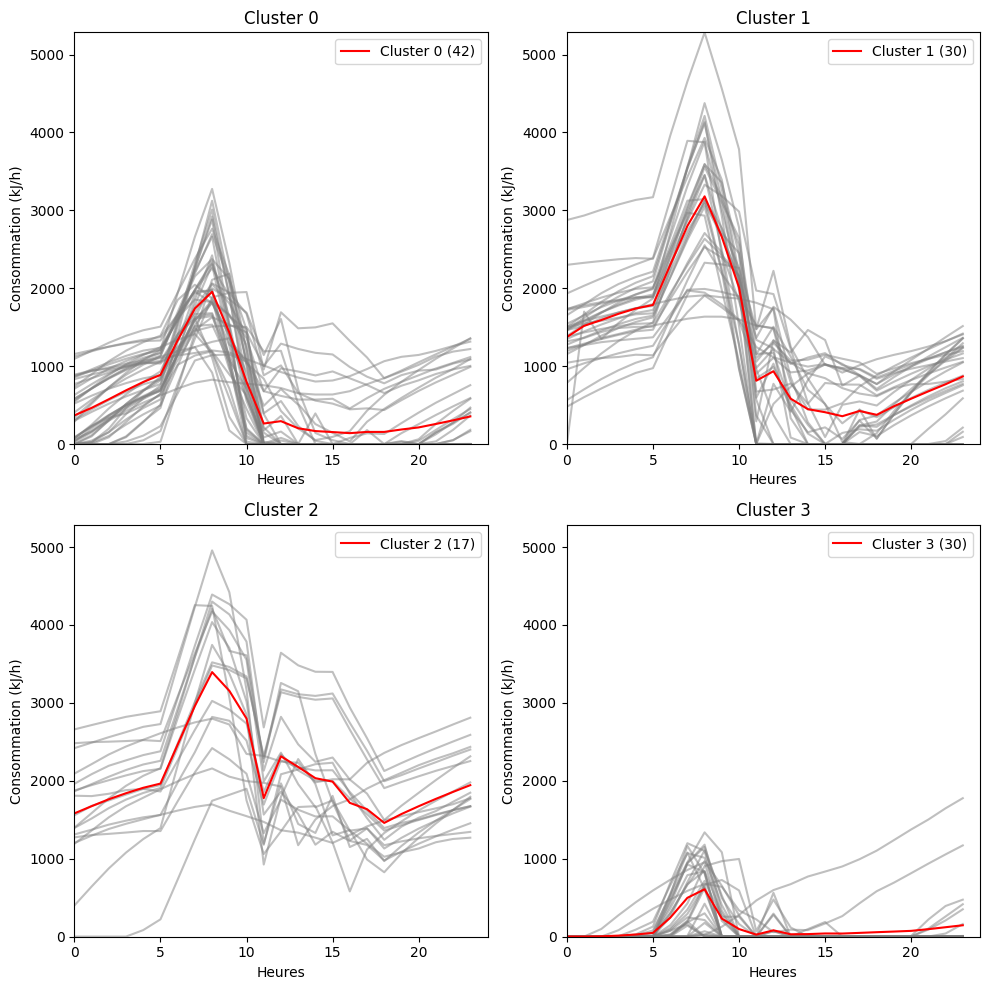

In [414]:
print("***************4 clusters pour les jours où le chauffage est allumé ***************")
plot_clusters(consommation_heat)

In [421]:
labels = consommation_heat['clusters'] 

consommation_heat2=consommation_heat.drop(columns=["clusters"])
sil_score = silhouette_score(consommation_heat2, labels, metric='euclidean')
db_score = davies_bouldin_score(consommation_heat2, labels)

print(f"Davies-Bouldin Index: {db_score}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 1.010011522799113
Silhouette Score: 0.371956056999969
